## Leetcode

76. Minimum Window Substring

https://leetcode.com/problems/minimum-window-substring/description/?envType=daily-question&envId=2024-02-04

**Description**

    Given two strings s and t of lengths m and n respectively, return the minimum window 
    substring
    of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

    The testcases will be generated such that the answer is unique.

    

    Example 1:

    Input: s = "ADOBECODEBANC", t = "ABC"
    Output: "BANC"
    Explanation: The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.
    Example 2:

    Input: s = "a", t = "a"
    Output: "a"
    Explanation: The entire string s is the minimum window.
    Example 3:

    Input: s = "a", t = "aa"
    Output: ""
    Explanation: Both 'a's from t must be included in the window.
    Since the largest window of s only has one 'a', return empty string.
    

**Constraints**

    m == s.length
    n == t.length
    1 <= m, n <= 10^5
    s and t consist of uppercase and lowercase English letters.
    

    Follow up: Could you find an algorithm that runs in O(m + n) time?

In [3]:
from collections import Counter

class Solution:
    def minWindow(self, s: str, t: str) -> str:
        target_count = Counter(t)
        required_chars = len(target_count)
        left = right = 0
        formed_chars = 0
        window_counts = {}
        ans = float("inf"), None, None
        
        while right < len(s):
            char = s[right]
            window_counts[char] = window_counts.get(char, 0) + 1
            if char in target_count and window_counts[char] == target_count[char]:
                formed_chars += 1
            while left <= right and formed_chars == required_chars:
                char = s[left]
                if right - left + 1 < ans[0]:
                    ans = (right - left + 1, left, right)
                window_counts[char] -= 1
                if char in target_count and window_counts[char] < target_count[char]:
                    formed_chars -= 1
                left += 1
            right += 1
        
        return "" if ans[0] == float("inf") else s[ans[1]:ans[2] + 1]

In [4]:
sol = Solution()
print(sol.minWindow(s = "ADOBECODEBANC", t = "ABC"))
print(sol.minWindow(s = "a", t = "a"))
print(sol.minWindow(s = "a", t = "aa"))

BANC
a



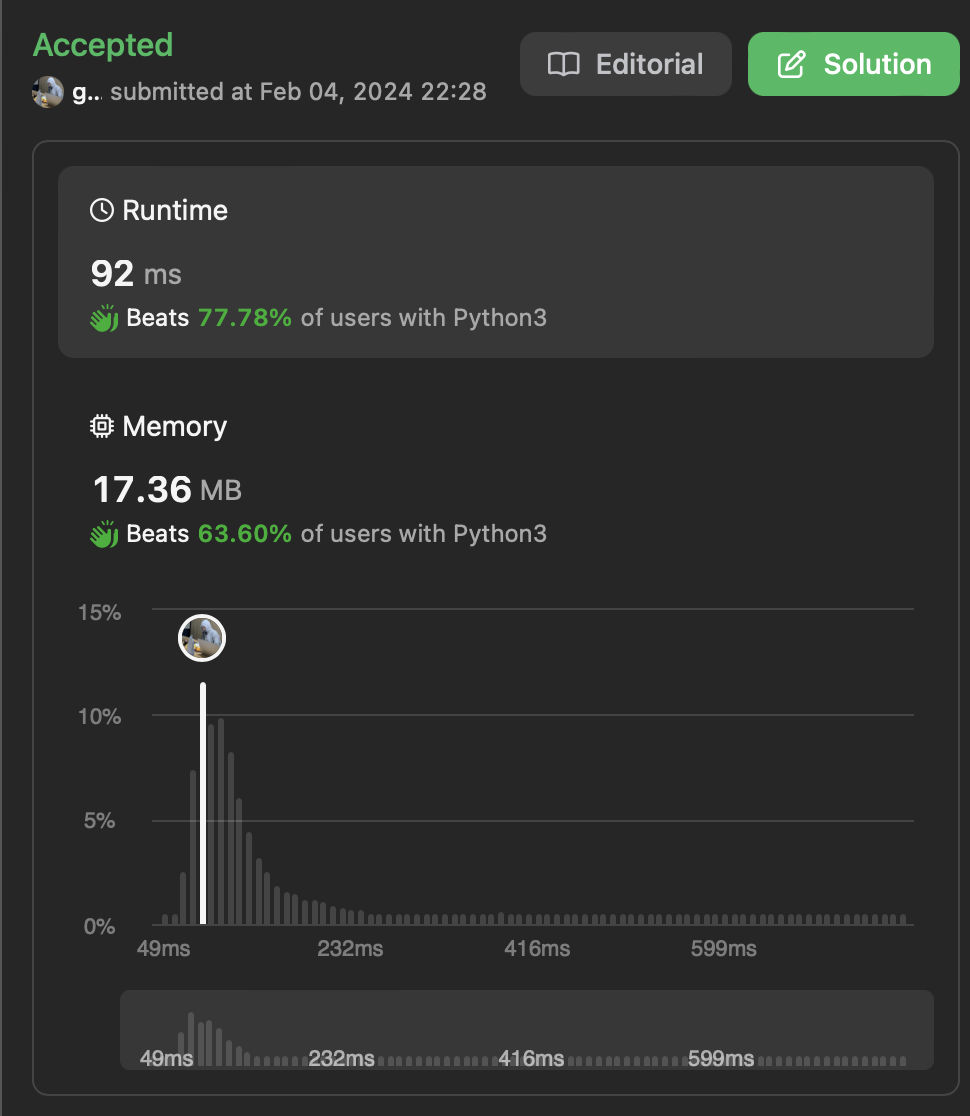